<a href="https://colab.research.google.com/github/IagoMagalhaes23/Atividades-PyTorch/blob/main/efficientnet_b0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Efficientnet-B0

##EfficientNets são uma família de modelos de classificação de imagens, que alcançam precisão de ponta, sendo uma ordem de grandeza menor e mais rápida que os modelos anteriores. Desenvolvemos EfficientNets com base em AutoML e Compound Scaling.

##Este colab utiliza como base o projeto de Luke Melas implementando os modelos de EfficientNets com Pytorch.

##Referências:
- https://github.com/lukemelas/EfficientNet-PyTorch
- https://colab.research.google.com/drive/1Jw28xZ1NJq4Cja4jLe6tJ6_F5lCzElb4#scrollTo=Y5D5FWdfyFma

###Instalação da EfficientNet Pytorch

In [1]:
!pip install efficientnet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=50879239020984342132f3d4745c38d8ca27603cbdffe0794eb94b8bb68d0fb8
  Stored in directory: /root/.cache/pip/wheels/84/b9/90/25a0195cf95fb5533db96f1c77ea3f296b7cc86ae8ae48e3dc
Successfully built efficientnet_pytorch


###Importações

In [3]:
!pip install vit_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 4.9 MB/s eta 0:00:00


In [6]:
import json
from PIL import Image

import torch
from torchvision import transforms
from vit_pytorch import ViT

from efficientnet_pytorch import EfficientNet

###Carregando modelo pré-treinado

In [7]:
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name) # 224

###Carregando imagem de teste

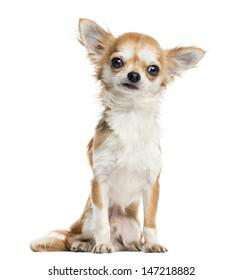

In [8]:
img = Image.open('img_0_302.jpg')
img

###Pré-processamento da imagem

In [9]:
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img = tfms(img).unsqueeze(0)

###Carregando labels

In [10]:
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]

###Criando classificador

In [11]:
model = EfficientNet.from_pretrained(model_name)
model.eval()
with torch.no_grad():
    logits = model(img)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

print('-----')
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b0
-----
Chihuahua                                                                   (81.91%)
papillon                                                                    (4.52%)
toy terrier                                                                 (1.85%)
Cardigan, Cardigan Welsh corgi                                              (0.46%)
Pembroke, Pembroke Welsh corgi                                              (0.45%)
